# *****************Water Flow Detector*****************

# Importing the Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the Excel file

In [83]:
dataset = pd.read_excel('Location1.xlsx')
df_noflow = pd.read_excel('fft_stop flow at loc1.xlsx')

In [84]:
dataset.head() #Head of the excel sheet

,x,y,z,output
0,118670.180000,121147.380000,42677.330000,1
1,39727.339210,8796.422092,11915.121084,1
2,12474.315395,1649.914080,8831.507067,1
3,4138.993245,1787.052510,5123.891205,1
4,7314.014811,1552.656601,5350.426431,1


In [85]:
dataset.tail() #Tail of the excel sheet

,x,y,z,output
3022,1386.448611,168.830364,737.454611,0
3023,1342.093682,265.357316,1183.039232,0
3024,742.270003,179.213526,1592.492452,0
3025,1437.140596,1414.916391,2672.987047,0
3026,3694.217594,3011.838140,4219.308823,0


In [86]:
df = pd.concat([dataset, df_noflow])
df

,x,y,z,output
0,118670.180000,121147.380000,42677.330000,1
1,39727.339210,8796.422092,11915.121084,1
2,12474.315395,1649.914080,8831.507067,1
3,4138.993245,1787.052510,5123.891205,1
4,7314.014811,1552.656601,5350.426431,1
...,...,...,...,...
12464,69583.517788,23433.917020,17857.417624,2
12465,87299.330579,28580.275828,23167.305785,2
12466,113107.937683,40400.378020,31504.946565,2
12467,159183.432016,64556.518162,47384.033494,2


In [87]:
X = df.iloc[:, [0,1, 2]].values # Input features

In [88]:
X

array([[118670.18      , 121147.38      ,  42677.33      ],
       [ 39727.33920961,   8796.42209196,  11915.12108394],
       [ 12474.31539505,   1649.91407971,   8831.50706695],
       ...,
       [113107.93768311,  40400.3780204 ,  31504.94656506],
       [159183.43201563,  64556.51816159,  47384.03349416],
       [267208.48631124, 122370.90105892,  72397.93145356]])

In [89]:
y = df.iloc[:, -1].values # Output parameter

In [90]:
y

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Split data for training & testing

# Scaling the feature space

In [92]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
X_train # Training set

array([[-0.01936728, -0.05294124,  0.01627888],
       [-0.0382683 , -0.06438125, -0.02204408],
       [-0.00019369, -0.03913371, -0.04695102],
       ...,
       [-0.02573009, -0.02385093, -0.01942907],
       [ 0.00810304, -0.07720211, -0.05474613],
       [-0.05339063, -0.0806495 , -0.0481829 ]])

In [94]:
X_test # Testing set

array([[ 0.01693484, -0.01589857,  0.1991663 ],
       [-0.0160113 , -0.04395133, -0.0585695 ],
       [ 0.04753016,  0.1475971 ,  0.13110767],
       ...,
       [-0.024637  ,  0.00146055,  0.01451007],
       [-0.01076674, -0.07830276, -0.03067792],
       [-0.04943245, -0.06920864, -0.04963495]])

# Decision Tree Classification

In [95]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [96]:
y_pred = classifier.predict(X_test) #predicted values set

# Confusion Matrix

[[  90   14   11]
 [  18  544   48]
 [   6   66 3077]]


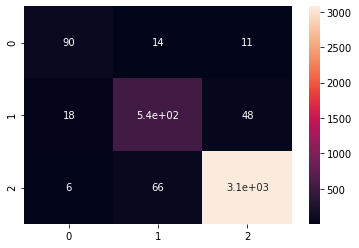

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
import seaborn as sns
sns.heatmap(cm, annot=True)

# Plotting the Decision Tree

[Text(3850.7924532647926, 3201.2, 'X[0] <= -0.044\nentropy = 0.849\nsamples = 11622\nvalue = [395, 1907, 9320]'),
 Text(2845.606358339264, 3080.4, 'X[1] <= -0.05\nentropy = 1.333\nsamples = 3831\nvalue = [325, 1697, 1809]'),
 Text(1971.3171163328589, 2959.6, 'X[1] <= -0.068\nentropy = 1.346\nsamples = 2371\nvalue = [325, 1414, 632]'),
 Text(1428.438421360309, 2838.7999999999997, 'X[2] <= -0.034\nentropy = 1.431\nsamples = 1342\nvalue = [325, 747, 270]'),
 Text(963.3428858275721, 2718.0, 'X[2] <= -0.046\nentropy = 1.376\nsamples = 1105\nvalue = [325, 628, 152]'),
 Text(464.8384760065067, 2597.2, 'X[0] <= -0.062\nentropy = 1.326\nsamples = 720\nvalue = [252, 399, 69]'),
 Text(98.83692557950386, 2476.4, 'X[1] <= -0.081\nentropy = 0.934\nsamples = 136\nvalue = [23, 106, 7]'),
 Text(52.44408296055307, 2355.6, 'X[2] <= -0.06\nentropy = 1.099\nsamples = 53\nvalue = [22, 30, 1]'),
 Text(32.27328182187881, 2234.8, 'X[1] <= -0.082\nentropy = 0.61\nsamples = 20\nvalue = [3, 17, 0]'),
 Text(24.204

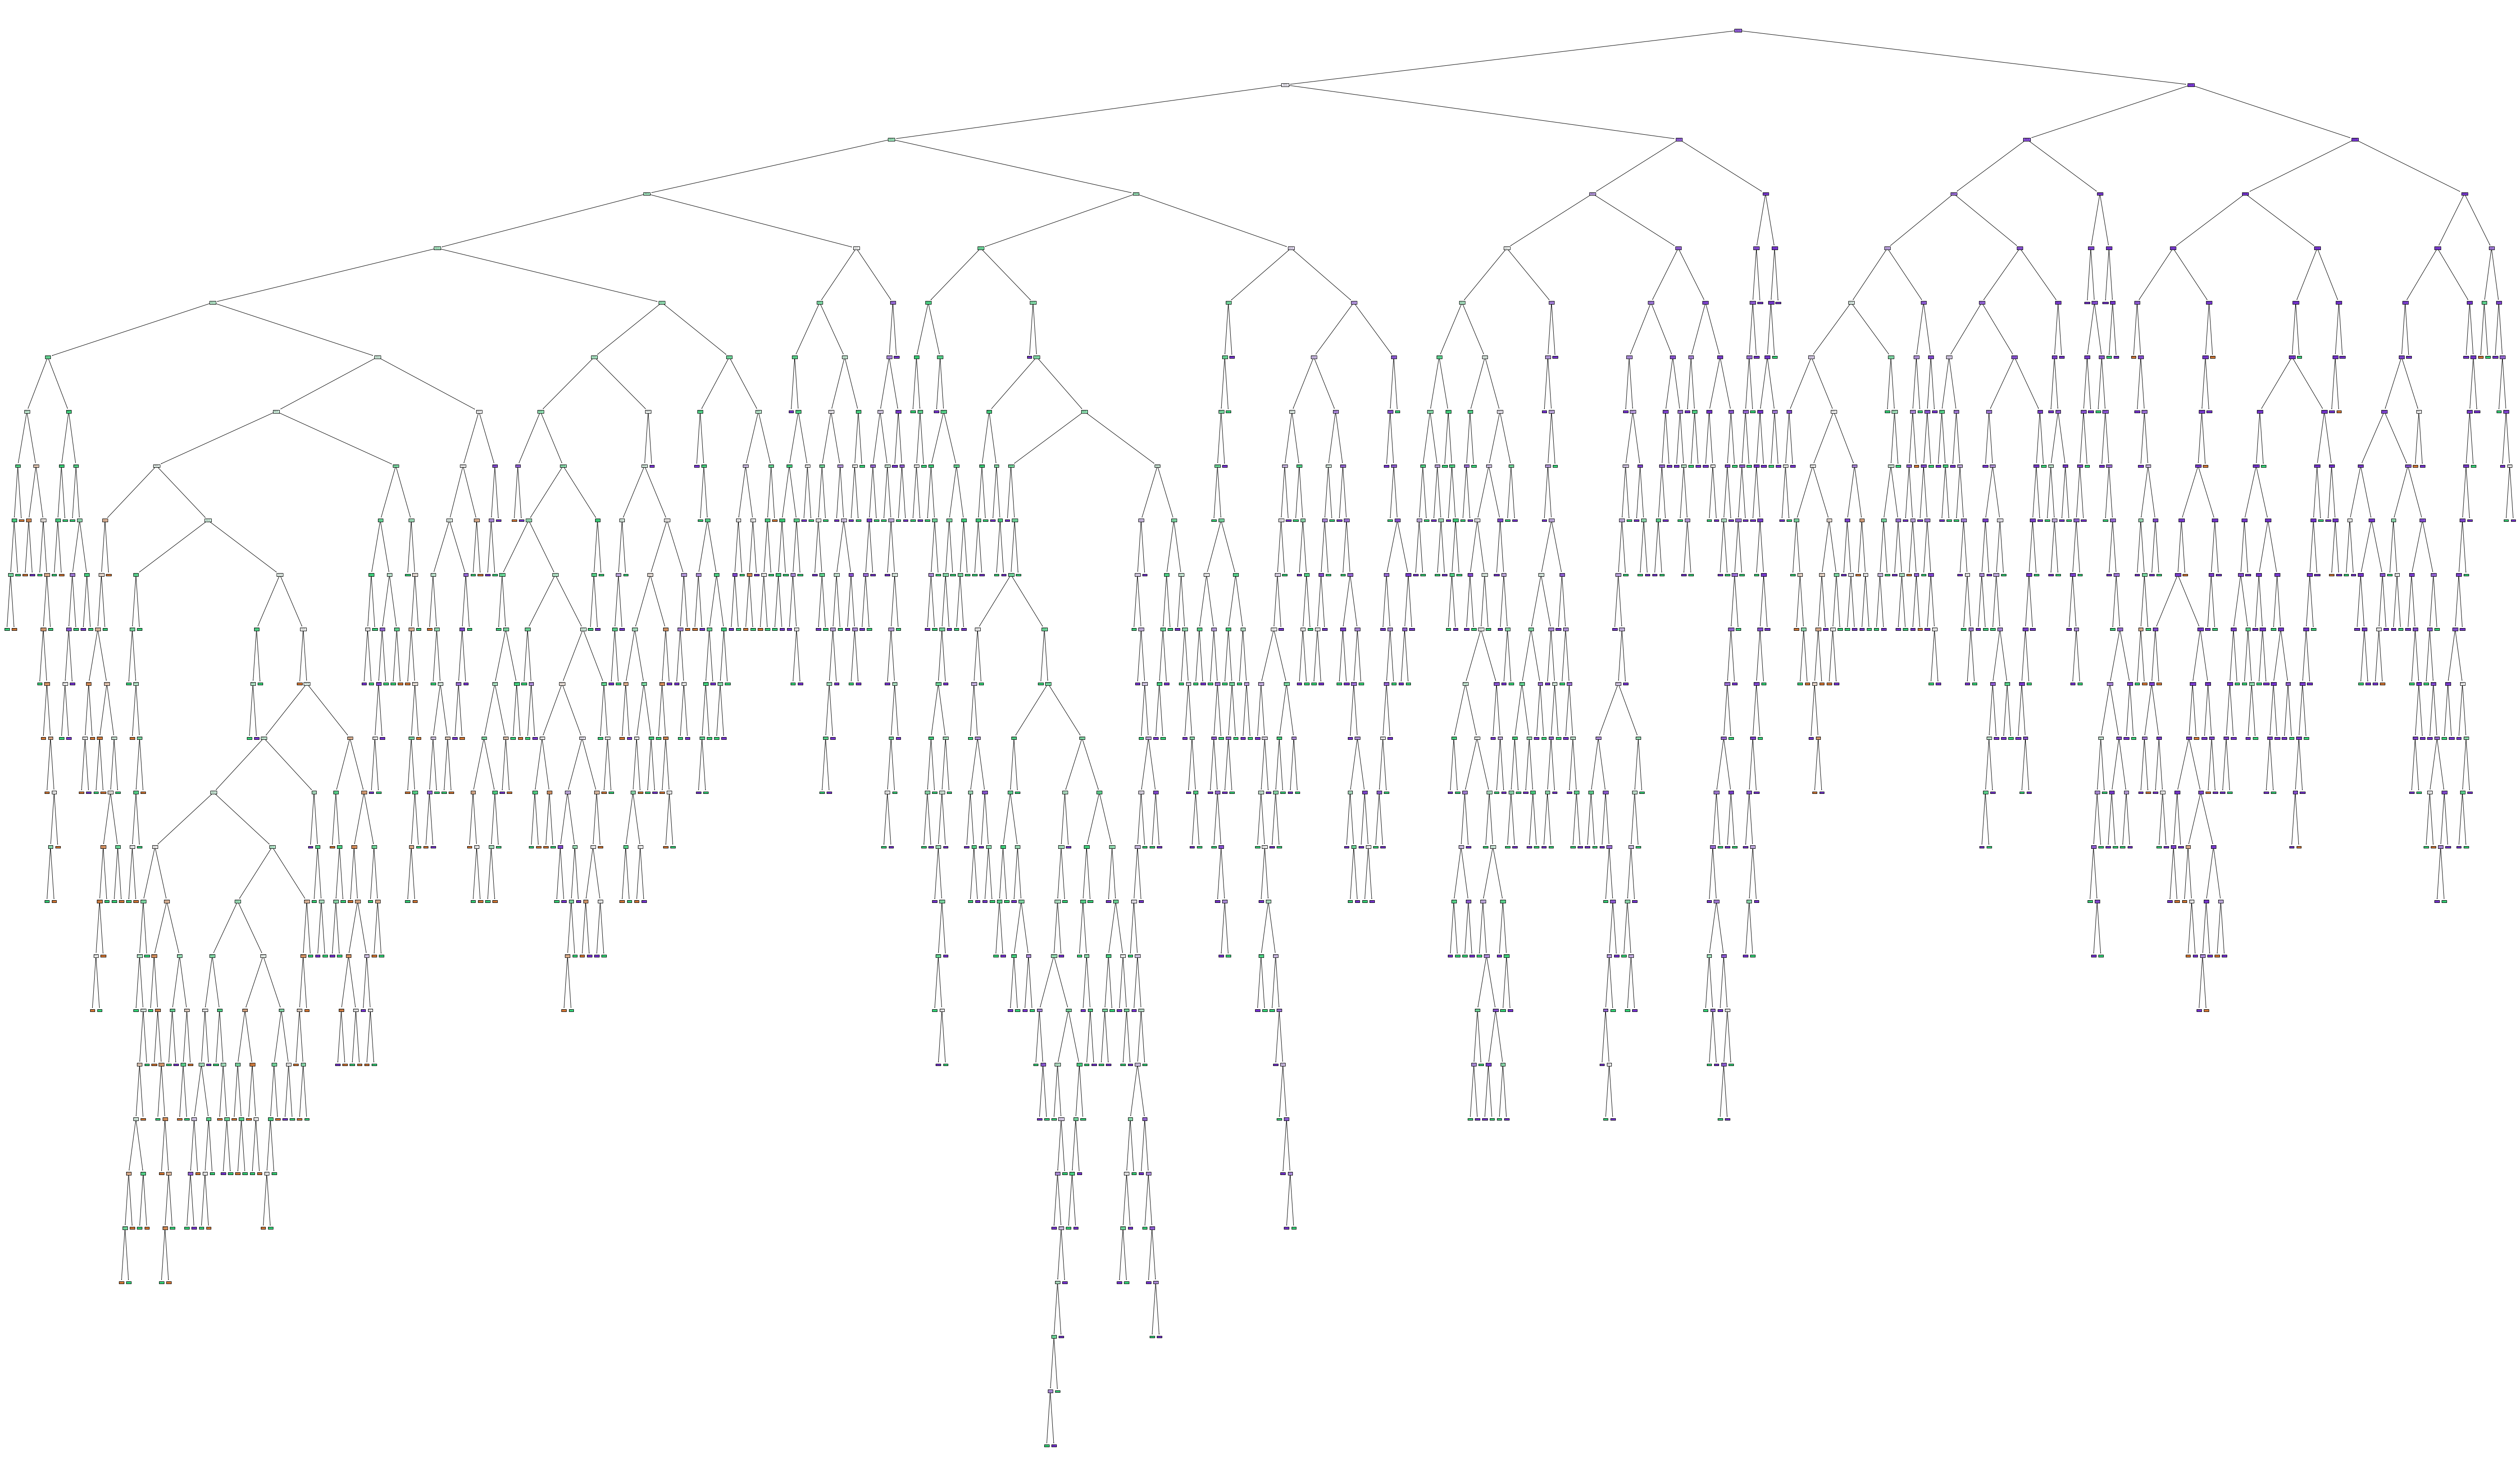

In [98]:
from sklearn import tree
plt.figure(figsize=(100,60))
tree.plot_tree(classifier,filled="True")

# Accuracy Score of the Model

In [99]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9579246257098606

# Saving the Model for Location1 data

In [100]:
import pickle
filename = 'Location1_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# Predicting for new data

In [101]:
new_data = np.array([[11000,9000, 4000]])    
new_data_scaled = sc.transform(new_data)

In [102]:
classifier.predict(new_data)
output_loc1 = float(classifier.predict(new_data))

# Loading the Excel file for Location2

In [103]:
dataset1 = pd.read_excel('Location2.xlsx')

In [104]:
dataset1 # loaded excel file of location 2

,x,y,z,output
0,1.070481e+06,348813.690000,317958.400000,1
1,2.069872e+05,98942.097833,63919.823159,1
2,1.340246e+05,64745.474201,44940.647733,1
3,4.987387e+04,2340.349112,37252.388145,1
4,5.196203e+04,15841.342116,23228.240265,1
...,...,...,...,...
14527,7.745590e+03,5072.399460,4642.622503,0
14528,2.215611e+04,5821.101718,5974.134524,0
14529,1.993043e+04,7045.799681,9144.569982,0
14530,2.172276e+04,9052.345928,2825.376004,0


In [105]:
X1 = dataset1.iloc[:, [0,1, 2]].values # Input features

In [106]:
y1 = dataset1.iloc[:, -1].values # Output parameter

# Train Test Split

In [107]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.25, random_state = 40) 
#Splitting data for training & testing

# Standard Scaling

In [108]:
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

# Decission Tree Modelling

In [109]:
classifier1 = DecisionTreeClassifier()
classifier1.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [110]:
y_pred1 = classifier1.predict(X_test1)

# Confusion matrix

[[1032  198]
 [ 164 2239]]


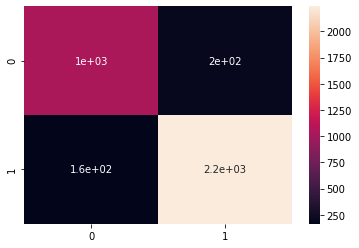

In [111]:
cm1 = confusion_matrix(y_test1, y_pred1)
print(cm1)
sns.heatmap(cm1, annot=True)

# Plotting DT

[Text(3148.946303693976, 3217.5243243243244, 'X[0] <= -0.039\ngini = 0.438\nsamples = 10899\nvalue = [3526, 7373]'),
 Text(2100.4505215987024, 3129.372972972973, 'X[2] <= -0.01\ngini = 0.5\nsamples = 4843\nvalue = [2463, 2380]'),
 Text(1517.2650354554928, 3041.2216216216216, 'X[0] <= -0.052\ngini = 0.497\nsamples = 4124\nvalue = [2225, 1899]'),
 Text(907.9114213189544, 2953.07027027027, 'X[2] <= -0.047\ngini = 0.484\nsamples = 2641\nvalue = [1560, 1081]'),
 Text(604.8843581540668, 2864.9189189189187, 'X[0] <= -0.06\ngini = 0.469\nsamples = 1466\nvalue = [916, 550]'),
 Text(420.17687580259974, 2776.7675675675673, 'X[0] <= -0.083\ngini = 0.442\nsamples = 960\nvalue = [643, 317]'),
 Text(398.0345140980396, 2688.6162162162163, 'X[0] <= -0.084\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(393.6354822989228, 2600.464864864865, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(402.43354589715636, 2600.464864864865, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(442.31923750715987, 26

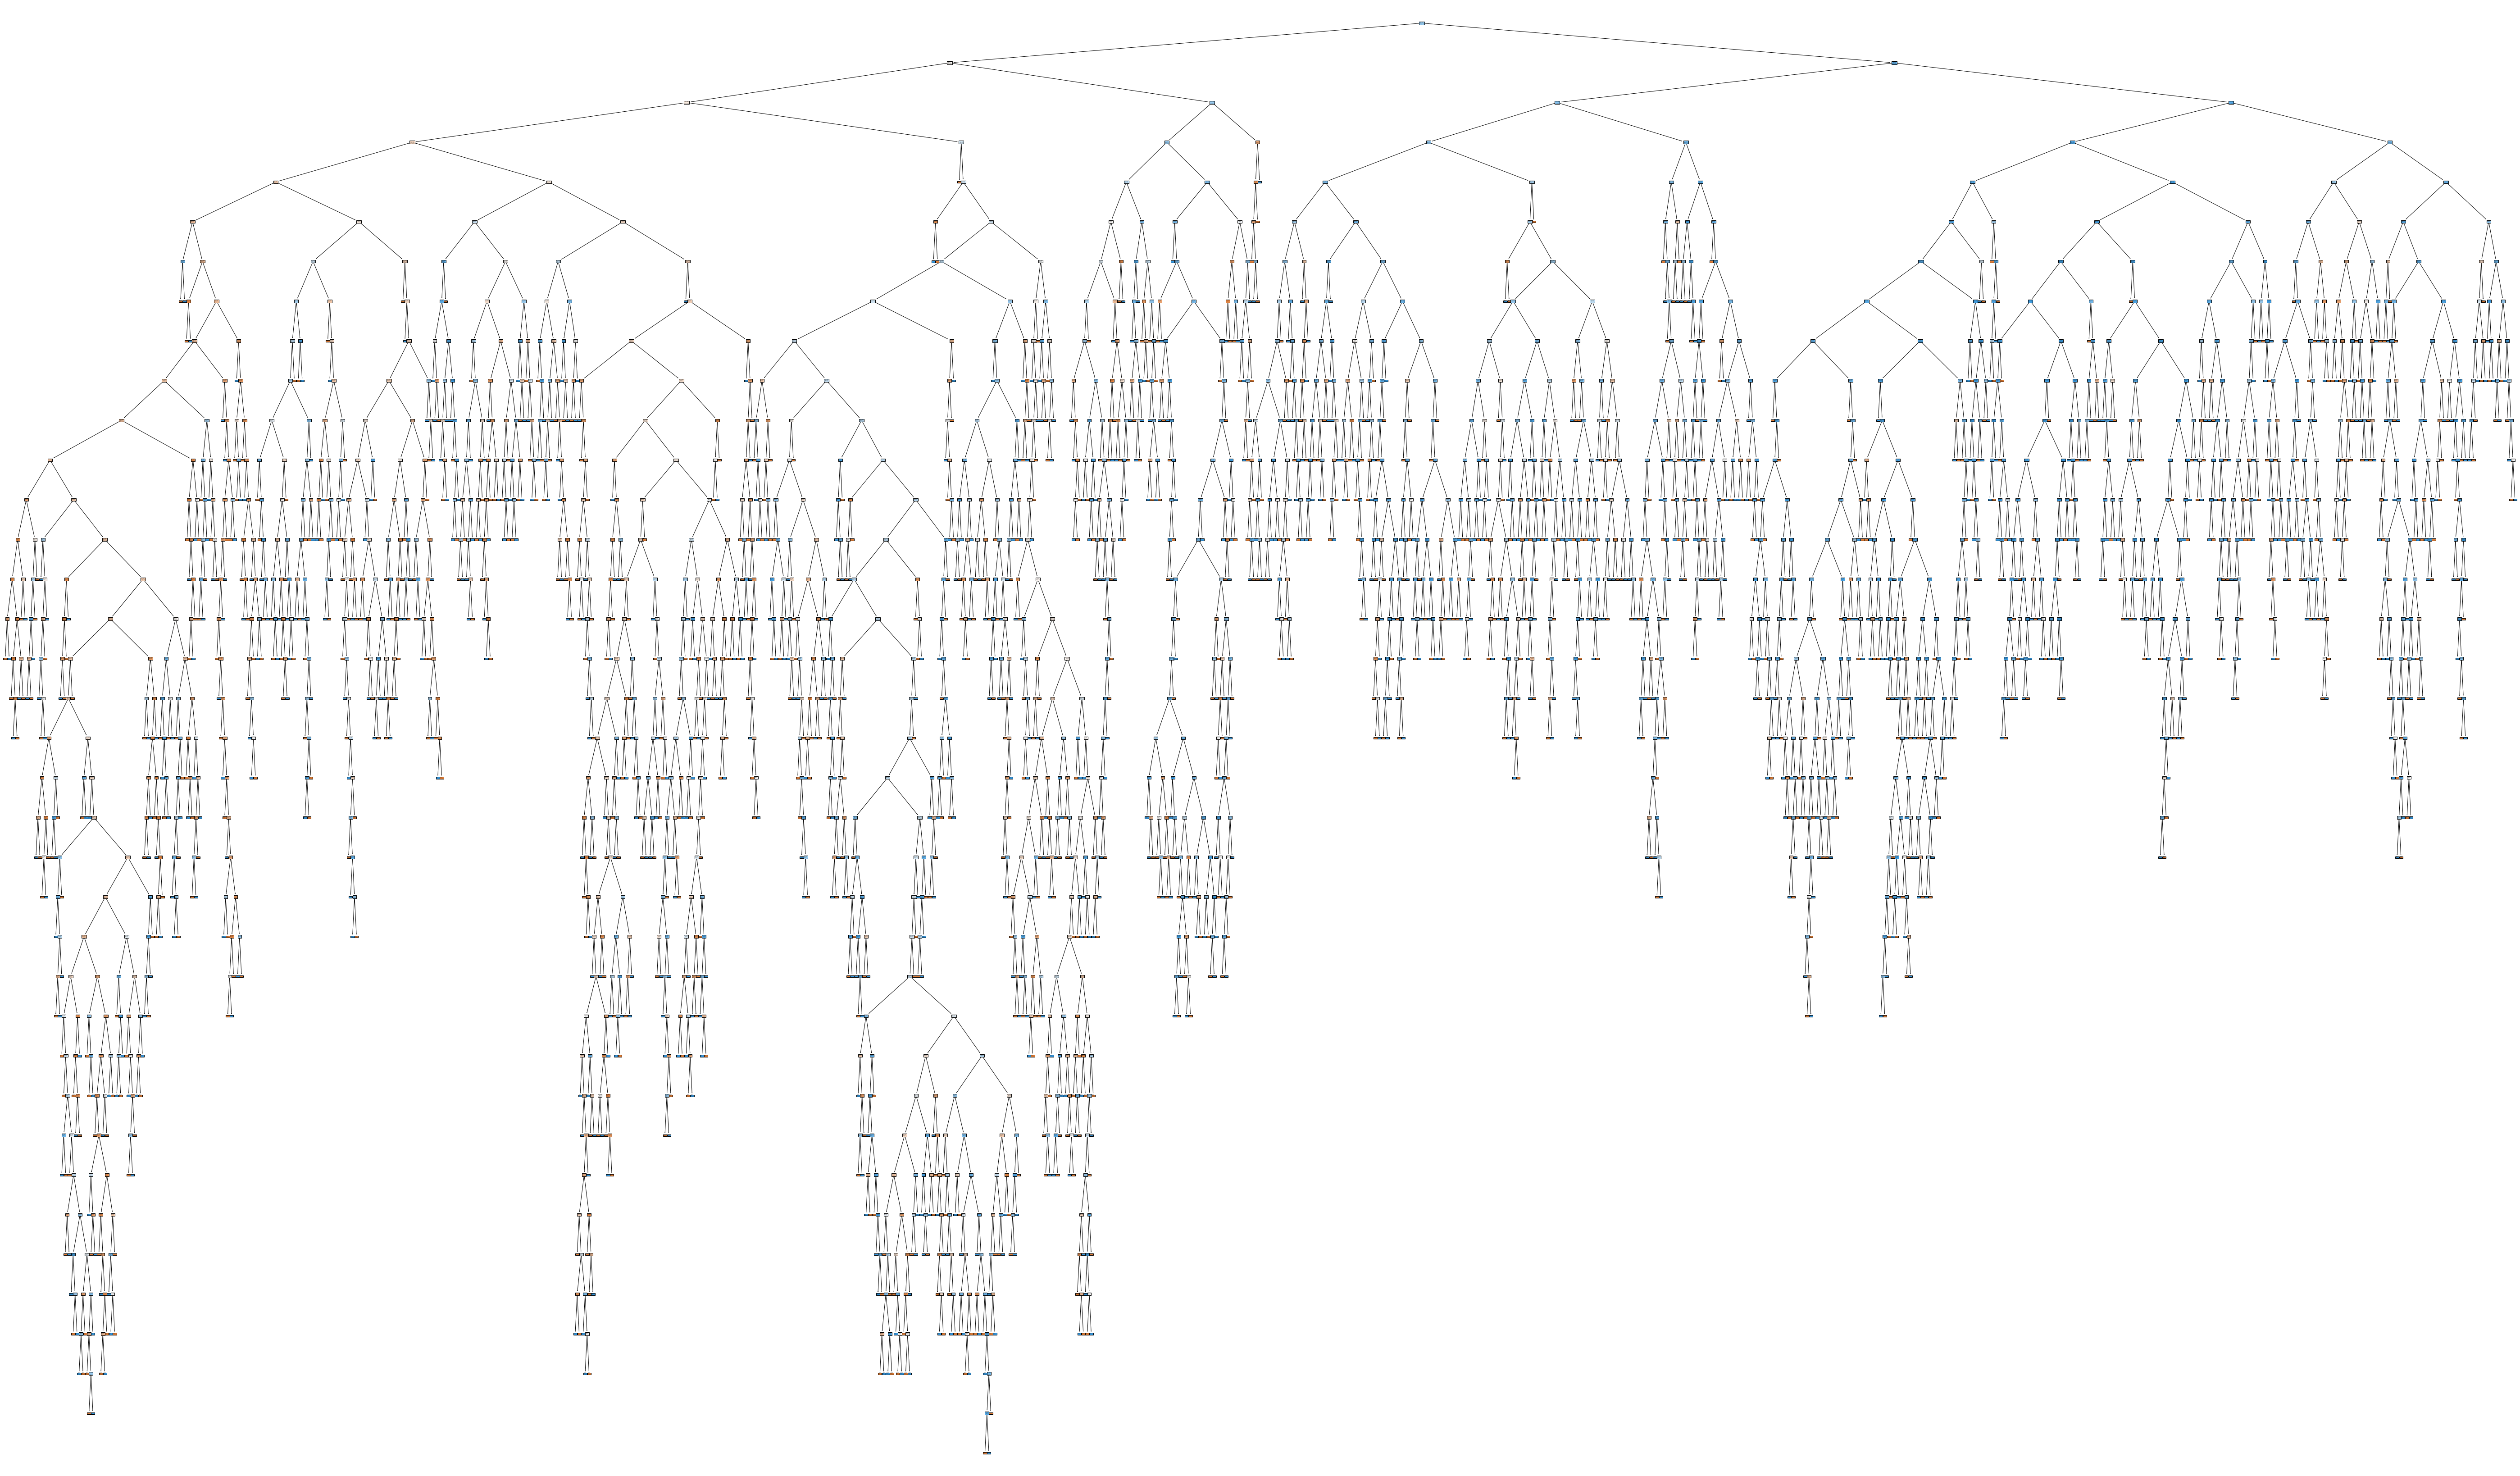

In [112]:
plt.figure(figsize=(100,60))
tree.plot_tree(classifier1,filled="True")

# Accuracy Score

In [113]:
y_pred1 = classifier1.predict(X_test1)
accuracy_score(y_test1,y_pred1)

0.9003578309936692

# Saving the model of Location 2

In [114]:
filename = 'Location2_model.sav'
pickle.dump(classifier1, open(filename, 'wb'))

In [115]:
classifier1.predict(new_data)
output_loc2 = float(classifier1.predict(new_data))

# Predicting the final output based on the data given

In [116]:
if(output_loc1 == 1):
    print('Water is flowing at Location 1')
if(output_loc1 == 0):
    print('Water is not flowing at Location 1')
if(output_loc1 == 2):
    print('Water stopped flowing at Location 1')
if(output_loc2 == 1):
    print('Water is flowing at Location 2')
if(output_loc2 == 0):
    print('Water is not flowing at Location 2')

Water stopped flowing at Location 1
Water is flowing at Location 2
